#Alunos:
###Gustavo D. de Almeida (202165571C)
###Gustavo C. Martins (202165513B)
###João Pedro B. Pereira (202165506B)
###Pedro de A. B. Bittencourt (202165114B)
    
#Sistemas Operacionais - DCC062
#Prof.: Eduardo Pagani Julio

#Bibliotecas

In [136]:
import numpy as np
import matplotlib.pyplot as plt

In [137]:
class pagina:
    def __init__(self, n, bitR):
        self.n = n
        self.bitR = bitR

In [138]:
def imprimindo_fila(fila, capacidade, proxima_pagina=None):

    # Ajustar o tamanho da figura
    fig, ax = plt.subplots(figsize=(capacidade, 1.5))

    # Mostrar a página que será inserida (em cima da fila, com cor diferente)
    if proxima_pagina is not None:
        ax.text(0.5, 1.3, str(proxima_pagina), fontsize=12, ha='center', va='center',
                bbox=dict(facecolor='lightgreen', edgecolor='black'))

    # Desenhar a fila de páginas
    for i in range(capacidade):
        if i < len(fila):
            ax.text(i + 0.5, 0.5, str(fila[i].n), fontsize=12, ha='center', va='center',
                    bbox=dict(facecolor='lightblue', edgecolor='black'))
            if fila[i].bitR:
                ax.text(i + 0.5, 0.9, "1", fontsize=8, ha='center', color='red')
            else:
                ax.text(i + 0.5, 0.9, "0", fontsize=8, ha='center', color='black')
        else:
            ax.text(i + 0.5, 0.5, "", fontsize=12, ha='center', va='center',
                    bbox=dict(facecolor='lightgray', edgecolor='black'))

    ax.set_xlim(0, capacidade)
    ax.set_ylim(0, 1.5)
    ax.set_axis_off()
    plt.show()


In [139]:
def verif_pag(p, fila):
    for i in range(len(fila)):
        if fila[i].n == p:
            fila[i].bitR = True
            return True
    return False

In [140]:
def segunda_chance(paginas, capacidade):
    fila = []
    pageFault = 0
    hit = 0

    print("Memória vazia!")
    for p in paginas:
        print("\nInserindo a página de valor: " + str(p))

        imprimindo_fila(fila, capacidade, p)

        if verif_pag(p, fila):
            print("\nPágina encontrada na memória!")
            hit += 1

        else:
            pageFault += 1
            print("\nPágina não está presente na memória!")
            if len(fila) == capacidade:
                page_number = fila[0].n
                while len(fila) > 0 and fila[0].bitR == True:
                    pag = fila.pop(0)
                    pag.bitR = False
                    fila.append(pag)
                    print("\nPágina " + str(pag.n) + " movida para final da fila")
                    imprimindo_fila(fila, capacidade, p)
                    page_number = fila[0].n
                print("\nPágina " + str(page_number) + " removida da memória!")
                del fila[0]

            print("\nPágina " + str(p) + " inserida na memória!")
            fila.append(pagina(p, False))

        imprimindo_fila(fila, capacidade)

    return pageFault, hit


Páginas: [1, 23, 30, 39, 5, 16, 36, 18, 16, 29, 22, 8, 2, 1, 27, 11, 14, 37, 32, 37]

Memória vazia!

Inserindo a página de valor: 1


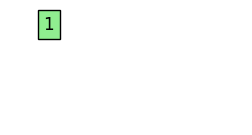


Página não está presente na memória!

Página 1 inserida na memória!


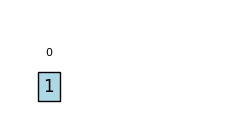


Inserindo a página de valor: 23


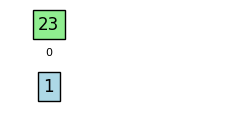


Página não está presente na memória!

Página 23 inserida na memória!


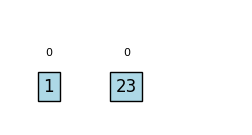


Inserindo a página de valor: 30


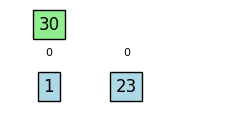


Página não está presente na memória!

Página 30 inserida na memória!


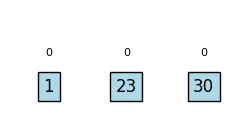


Inserindo a página de valor: 39


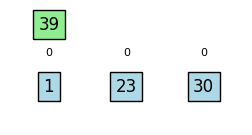


Página não está presente na memória!

Página 1 removida da memória!

Página 39 inserida na memória!


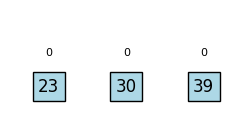


Inserindo a página de valor: 5


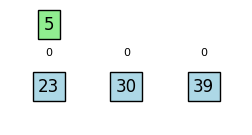


Página não está presente na memória!

Página 23 removida da memória!

Página 5 inserida na memória!


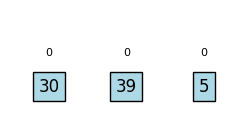


Inserindo a página de valor: 16


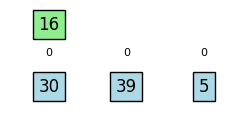


Página não está presente na memória!

Página 30 removida da memória!

Página 16 inserida na memória!


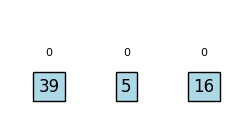


Inserindo a página de valor: 36


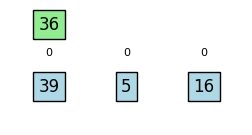


Página não está presente na memória!

Página 39 removida da memória!

Página 36 inserida na memória!


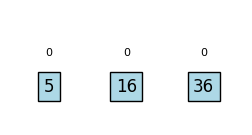


Inserindo a página de valor: 18


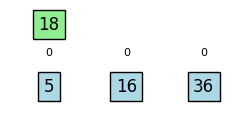


Página não está presente na memória!

Página 5 removida da memória!

Página 18 inserida na memória!


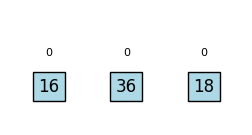


Inserindo a página de valor: 16


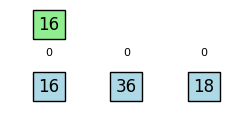


Página encontrada na memória!


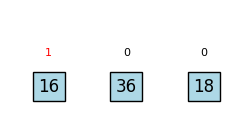


Inserindo a página de valor: 29


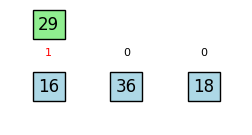


Página não está presente na memória!

Página 16 movida para final da fila


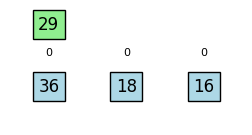


Página 36 removida da memória!

Página 29 inserida na memória!


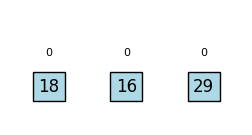


Inserindo a página de valor: 22


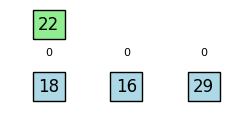


Página não está presente na memória!

Página 18 removida da memória!

Página 22 inserida na memória!


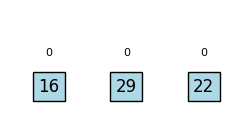


Inserindo a página de valor: 8


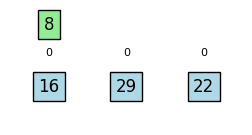


Página não está presente na memória!

Página 16 removida da memória!

Página 8 inserida na memória!


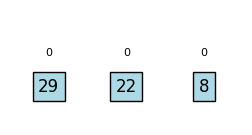


Inserindo a página de valor: 2


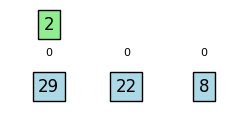


Página não está presente na memória!

Página 29 removida da memória!

Página 2 inserida na memória!


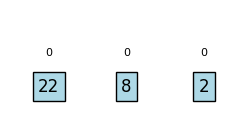


Inserindo a página de valor: 1


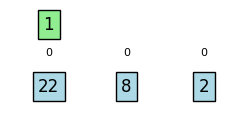


Página não está presente na memória!

Página 22 removida da memória!

Página 1 inserida na memória!


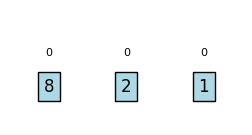


Inserindo a página de valor: 27


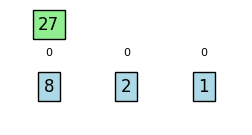


Página não está presente na memória!

Página 8 removida da memória!

Página 27 inserida na memória!


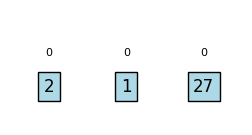


Inserindo a página de valor: 11


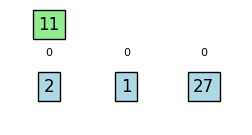


Página não está presente na memória!

Página 2 removida da memória!

Página 11 inserida na memória!


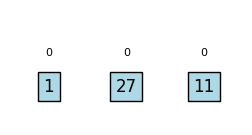


Inserindo a página de valor: 14


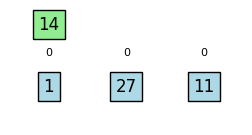


Página não está presente na memória!

Página 1 removida da memória!

Página 14 inserida na memória!


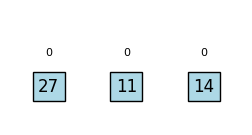


Inserindo a página de valor: 37


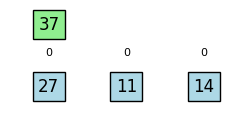


Página não está presente na memória!

Página 27 removida da memória!

Página 37 inserida na memória!


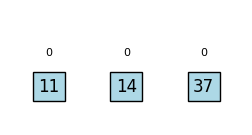


Inserindo a página de valor: 32


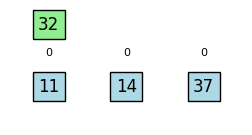


Página não está presente na memória!

Página 11 removida da memória!

Página 32 inserida na memória!


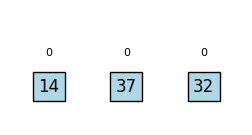


Inserindo a página de valor: 37


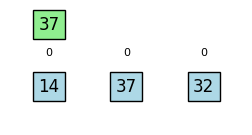


Página encontrada na memória!


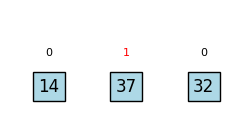


PageFaults: 18
Hits: 2


In [141]:
n = 20

paginas = []

for i in range(n):
    paginas.append(np.random.randint(0, 2*n))

print("Páginas: " + str(paginas) + "\n")

frames = int(n / 1.5)

pageFault, hit = segunda_chance(paginas, frames)

print("\nPageFaults: " + str(pageFault))
print("Hits: " + str(hit))

In [142]:
def segunda_chance_sp(paginas, capacidade):
    fila = []
    pageFault = 0
    hit = 0

    for p in paginas:

        if verif_pag(p, fila):
            hit += 1

        else:
            pageFault += 1
            if len(fila) == capacidade:
                while len(fila) > 0 and fila[0].bitR == True:
                    pag = fila.pop(0)
                    pag.bitR = False
                    fila.append(pag)
                del fila[0]

            fila.append(pagina(p, False))


    return pageFault, hit


In [143]:
n = 1000

paginas = []
pagesFault = []
hits = []
frames = []

for i in range(n):
    paginas.append(np.random.randint(0, n))

qtd = 100

for i in range(1, qtd + 1):
    frame = i
    pageFault, hit = segunda_chance_sp(paginas, frame)

    frames.append(frame)
    pagesFault.append(pageFault)
    hits.append(hit)

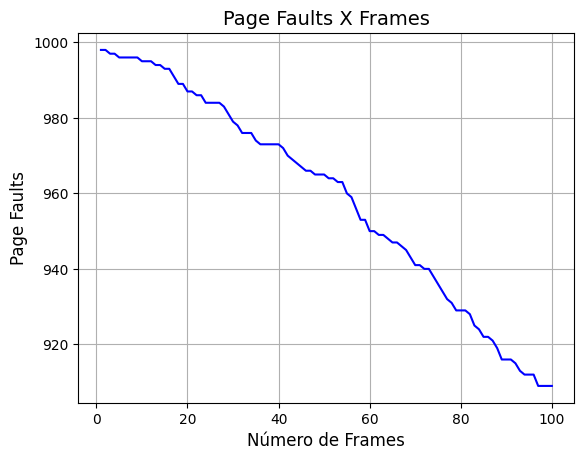

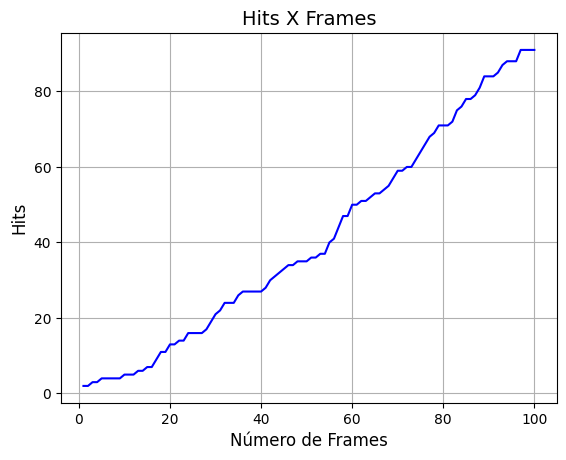

In [144]:
plt.plot(frames, pagesFault, linestyle='-', color='b')

plt.title('Page Faults X Frames', fontsize=14)
plt.xlabel('Número de Frames', fontsize=12)
plt.ylabel('Page Faults', fontsize=12)

plt.grid(True)

plt.show()

plt.plot(frames, hits, linestyle='-', color='b')

plt.title('Hits X Frames', fontsize=14)
plt.xlabel('Número de Frames', fontsize=12)
plt.ylabel('Hits', fontsize=12)

plt.grid(True)

plt.show()

In [149]:
qtd = 100
frame = 10
pags = []
pagesFault = []
hits = []

for i in range(1, qtd+1):
    paginas = []

    for j in range(1, i):
        paginas.append(np.random.randint(0, i))

    pageFault, hit = segunda_chance_sp(paginas, frame)

    pags.append(len(paginas))
    pagesFault.append(pageFault)
    hits.append(hit)

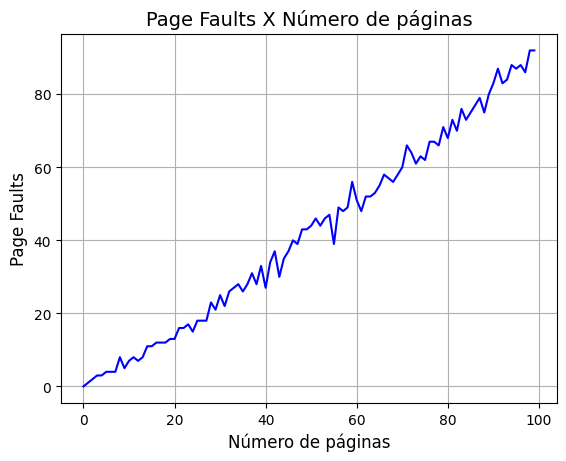

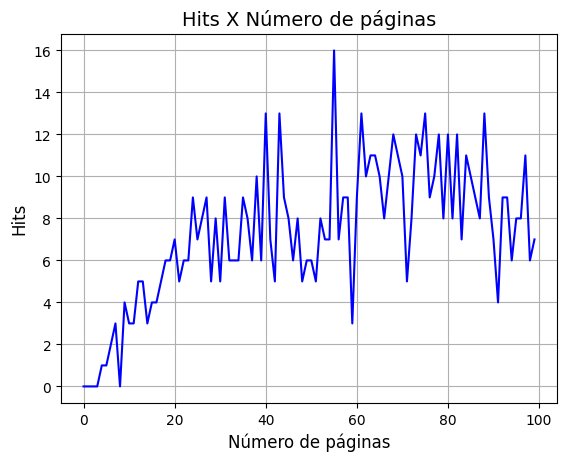

In [150]:
plt.plot(pags, pagesFault, linestyle='-', color='b')

plt.title('Page Faults X Número de páginas', fontsize=14)
plt.xlabel('Número de páginas', fontsize=12)
plt.ylabel('Page Faults', fontsize=12)

plt.grid(True)

plt.show()

plt.plot(pags, hits, linestyle='-', color='b')

plt.title('Hits X Número de páginas', fontsize=14)
plt.xlabel('Número de páginas', fontsize=12)
plt.ylabel('Hits', fontsize=12)

plt.grid(True)

plt.show()